# Important Links

GAN for Face Generator: https://github.com/AshishJangra27/Face-Generator-with-GAN

Gender Style Transfer: https://github.com/AshishJangra27/Gender-Style-Transfer

Gender Classifier: https://github.com/AshishJangra27/Gender-Classifier

LinkedIn: https://www.linkedin.com/in/ashish-jangra/

Assignment:

- Load the pretrainde Generator
- Load Gender Vector
- Generate 10 variations of the image from male to female as per gender vector

## Load the pretrained model of Generator

In [1]:
! git clone https://github.com/AshishJangra27/Face-Generator-with-GAN

Cloning into 'Face-Generator-with-GAN'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 34 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 160.27 MiB | 15.64 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (10/10), done.


In [5]:
! git clone https://github.com/AshishJangra27/Gender-Style-Transfer

Cloning into 'Gender-Style-Transfer'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 20 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 18.87 MiB | 12.14 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [12]:
! git clone https://github.com/AshishJangra27/Gender-Classifier

Cloning into 'Gender-Classifier'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 4.14 MiB | 9.60 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [50]:
import kagglehub

# Download latest version
path = kagglehub.model_download("ashishjangra27/gender-classifier-mobilenet/keras/gender-classifier-mobilenet")

print("Path to model files:", path)

Path to model files: /kaggle/input/gender-classifier-mobilenet/keras/gender-classifier-mobilenet/1


In [44]:
import os
import ast
import tensorflow as tf
import pandas as pd
import numpy as np
from tqdm import tqdm
from PIL import Image
import imageio
import matplotlib.pyplot as plt

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

generator = tf.keras.models.load_model('/content/Face-Generator-with-GAN/generator_700.h5', compile=False)



(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

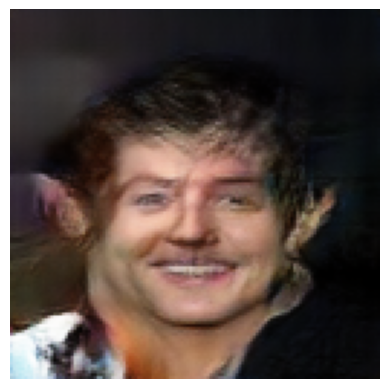

In [17]:
noise = tf.random.normal([1, 100])

with tf.device('/CPU:0'):
    generated_images = generator(noise, training=False)

generated_images = (generated_images + 1) / 2.0

plt.imshow(generated_images[0])
plt.axis('off')

## Load the gender classifier

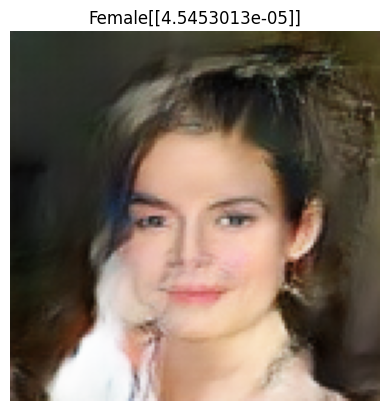

In [54]:
classifier = tf.keras.models.load_model('/kaggle/input/gender-classifier-mobilenet/keras/gender-classifier-mobilenet/1/gender_classifier.keras')
noise = tf.random.normal([1, 100])

generated_image = generator(noise, training=False)
generated_image = (generated_image + 1) / 2.0  # Rescale from [-1,1] to [0,1]

generate_img = tf.image.resize(generated_image, (224, 224))

prediction = classifier.predict(generate_img, verbose = 0)
label = "Male" if prediction[0][0] > 0.5 else "Female"

plt.title(label + str(prediction))
plt.imshow(generated_image[0])
plt.axis('off')
plt.show()

## Load the Gender Vector


In [55]:
male_vec   = pd.read_csv('/content/Gender-Style-Transfer/male_images_data.csv')['noise_vector']
female_vec = pd.read_csv('/content/Gender-Style-Transfer/female_images_data.csv')['noise_vector']

male_vec = np.array([np.array(ast.literal_eval(vec)) for vec in male_vec])
female_vec = np.array([np.array(ast.literal_eval(vec)) for vec in female_vec])

avg_male_vec = np.mean(male_vec, axis=0)
avg_female_vec = np.mean(female_vec, axis=0)

print("Average Noise Vector (Male):", avg_male_vec)
print("Average Noise Vector (Female):", avg_female_vec)

Average Noise Vector (Male): [[-0.03971258 -0.06965943  0.00356897  0.00640304 -0.21249051 -0.09229452
  -0.04259478  0.07553213  0.22617031 -0.17790783  0.28319609  0.10857499
  -0.03823045 -0.31559354 -0.24628071  0.03348317 -0.22993282  0.04861173
  -0.00585154 -0.08720009 -0.08516999 -0.18133756  0.11148302  0.08788833
   0.15843068  0.04221111 -0.05985005  0.17341407  0.16704901 -0.0814995
   0.01657156  0.12935034 -0.11328441 -0.25267418  0.13558398 -0.28655694
   0.33639507  0.01914521  0.17857791  0.19870061 -0.05791203 -0.10840931
  -0.18405729 -0.01757116 -0.16858907  0.15148676  0.00552569  0.06799198
  -0.05409135  0.03634662 -0.11298827  0.19775391  0.03667391  0.12799914
  -0.12258946  0.03495421 -0.03805487  0.1108679  -0.20347688 -0.0874216
  -0.00659081 -0.14985104  0.12018388 -0.08695146  0.10339797  0.33737177
  -0.07528706 -0.04015739  0.11054354  0.0293739  -0.09600242  0.19884786
   0.14673617 -0.00366311 -0.1227755  -0.04305195 -0.14596911 -0.08136474
  -0.010025

In [56]:
gender_vec = avg_male_vec - avg_female_vec
print("Gender Vector:", gender_vec)

Gender Vector: [[-0.05478645 -0.114842   -0.01518576 -0.05204009 -0.33291319 -0.14301158
  -0.06315659  0.15530318  0.35226835 -0.2233536   0.37908     0.18801062
  -0.08730981 -0.46865175 -0.36178236  0.05096163 -0.37590794  0.05809658
   0.01184345 -0.11792198 -0.17184215 -0.29254956  0.1816972   0.10340008
   0.29698148  0.13738097 -0.06392506  0.34061705  0.21613098 -0.17029291
  -0.01247712  0.14354251 -0.18945978 -0.32408784  0.24134309 -0.41079436
   0.53260371  0.05901311  0.20361925  0.39806108 -0.17610286 -0.20452294
  -0.22543444 -0.07153255 -0.26445809  0.22763855 -0.04348516  0.12997434
  -0.03830962  0.07540316 -0.16736046  0.33230106  0.00621929  0.17168332
  -0.20180173  0.13465692 -0.0845578   0.18435748 -0.31218845 -0.14609092
  -0.04791086 -0.19169929  0.16902465 -0.15818881  0.09132981  0.50687629
  -0.12879393 -0.07016915  0.17227242 -0.02986186 -0.20334112  0.28256702
   0.22044075 -0.05638778 -0.13397296  0.02699272 -0.20402719 -0.12281531
   0.05754045  0.147102

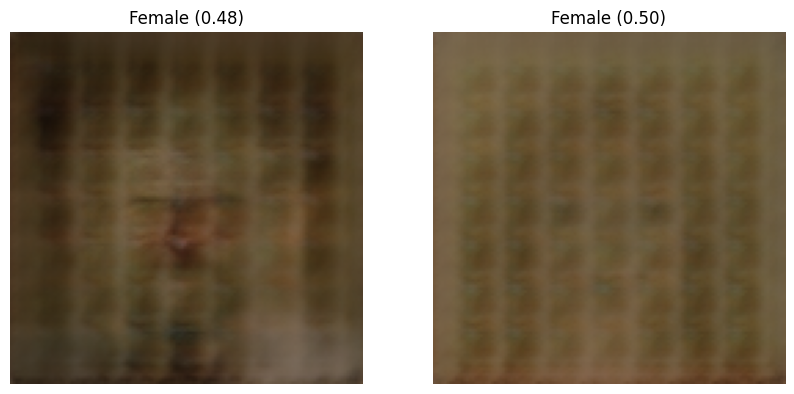

In [57]:
def generate_and_predict(noise_vec):
    generated_img = generator(noise_vec, training=False)
    generated_img = (generated_img + 1) / 2.0  # Rescale from [-1,1] to [0,1]
    resized_img = tf.image.resize(generated_img, (224, 224))
    prediction = classifier.predict(resized_img, verbose=0)
    label = "Male" if prediction[0][0] > 0.5 else "Female"
    return generated_img[0], f"{label} ({prediction[0][0]:.2f})"

male_img, male_label = generate_and_predict(avg_male_vec)
female_img, female_label = generate_and_predict(avg_female_vec)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(male_img)
axes[0].set_title(male_label)
axes[0].axis("off")

axes[1].imshow(female_img)
axes[1].set_title(female_label)
axes[1].axis("off")

plt.show()

## Generate 10 variations of the image from male to female as per gender vector

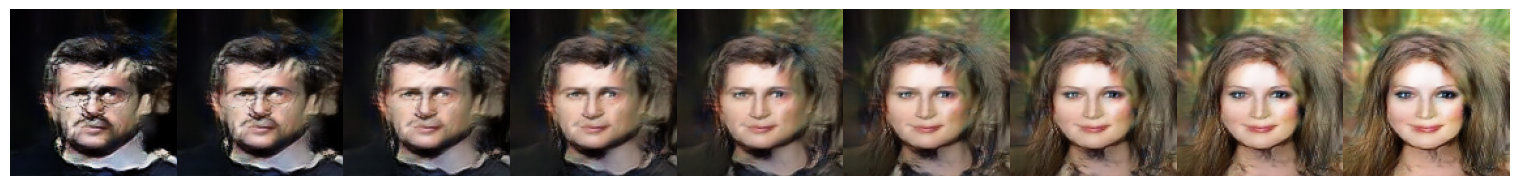

In [25]:
def generate(noise):
    return (generator(noise, training=False) + 1) / 2.0

noise = tf.random.normal([1, 100])
modifications = [2, 1.5, 1, 0.5, 0, -0.5, -1, -1.5, -2]

fig, axes = plt.subplots(1, 9, figsize=(15, 3))

for i, mod in enumerate(modifications):
    axes[i].imshow(generate(noise + mod * gender_vec)[0])
    axes[i].axis("off")

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout(pad=0)
plt.show()

## Generate bulk with 10 variations of the image from male to female as per gender vector

In [36]:
def generate(noise):
    return (generator(noise, training=False) + 1) / 2.0  # Rescale [-1,1] to [0,1]

# Generate 10 different noise vectors
noises = tf.random.normal([10, 100])
modifications = [2.5,2, 1.5, 1, 0.5, 0, -0.5, -1, -1.5, -2,-2.5]

fig, axes = plt.subplots(10, 11, figsize=(15, 15))  # 10 rows, 11 columns

for row, noise in enumerate(noises):
    for col, mod in enumerate(modifications):
        axes[row, col].imshow(generate(noise + mod * gender_vec)[0])
        axes[row, col].axis("off")

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout(pad=0)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Generate the GIF

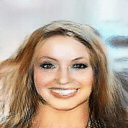

In [45]:
def generate(noise):
    return (generator(noise, training=False) + 1) / 2.0  # Rescale [-1,1] to [0,1]

# Start with a single noise vector
noise = tf.random.normal([1, 100])

# Generate 30 modifications smoothly transitioning
modifications = np.linspace(-3, 3, 60)

# Create list to store frames
frames = []

# Generate each variant and store in frames
for mod in modifications:
    img = generate(noise + mod * gender_vec)[0].numpy()  # Convert tensor to NumPy array
    frames.append((img * 255).astype(np.uint8))  # Convert to uint8 for GIF

imageio.mimsave("face_transformation.gif", frames, duration=5/30)  # 30 FPS over 5s

# Display GIF inside a Jupyter Notebook (Optional)
from IPython.display import display, Image
display(Image(filename="face_transformation.gif"))